## AGUATHON ITA

Code based on:

## Machine Learning Mastery With Python
### End-to-End Project
#### Based on: Jason Brownlee Book

In [1]:
%matplotlib notebook
import os
import scipy
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import datetime as dt

print( 'scipy: {} ' .format(scipy.__version__))
print( 'numpy: {} ' .format(np.__version__))
print( 'matplotlib: {} ' .format(mpl.__version__))
print( 'pandas: {} ' .format(pd.__version__))
print('sklearn: {}' .format(sklearn.__version__))

scipy: 1.1.0 
numpy: 1.15.4 
matplotlib: 3.0.2 
pandas: 0.23.4 
sklearn: 0.20.1


## Load CSV Data

In [2]:
def load_dataset():
    ''' 
    Load CSV using Pandas saved in current working directory
    '''
    cwd = os.getcwd()
    in_path = os.path.join(cwd,'data','ENTRADA')
    in_file = 'datos.csv'
    filename  = os.path.join(in_path,in_file)
    #names = [ 'preg' , 'plas' , 'pres' , 'skin' , 'test' , 'mass' , 'pedi' , 'age' , 'class' ]
                #df = pd.read_csv(in_csv
                #             , parse_dates=[['date','time']]
                #             , infer_datetime_format=True
                #             , index_col='date_time')
    data = pd.read_csv(filename, parse_dates = ['time'], index_col = 'time') #, names=names)
    return data

### DATA PREPARATION

In [3]:
data=load_dataset()
data.columns = ['Ala','Gri','Nov','Tau','Tud','Zar','Risk','P24','P48','P72']
cols = [x for x in data.columns if x !='Risk']
df = data.loc[:,cols]

### FILL MISSING VALUES
df.dropna(axis=0, how='any', inplace=True)

f1 = df.index.month <= 6
f2 = df.index.month >= 11
#df = df[f1|f2]

#df.fillna(method='ffill', inplace=True)
Y = df['P72']
X = df.loc[:,('Tud', 'Nov', 'Ala', 'Zar')]#, 'Gri', 'Tau')]

df.shape

(75666, 9)

In [42]:
df.max()

Ala    7.8950
Gri    4.0750
Nov    8.3775
Tau    3.2350
Tud    5.8475
Zar    6.1000
P24    6.1000
P48    6.1000
P72    6.1000
dtype: float64

### 0 DATA EXPLORATION

In [4]:
dfplot = df.copy()
dfplot = dfplot/8.0

<IPython.core.display.Javascript object>


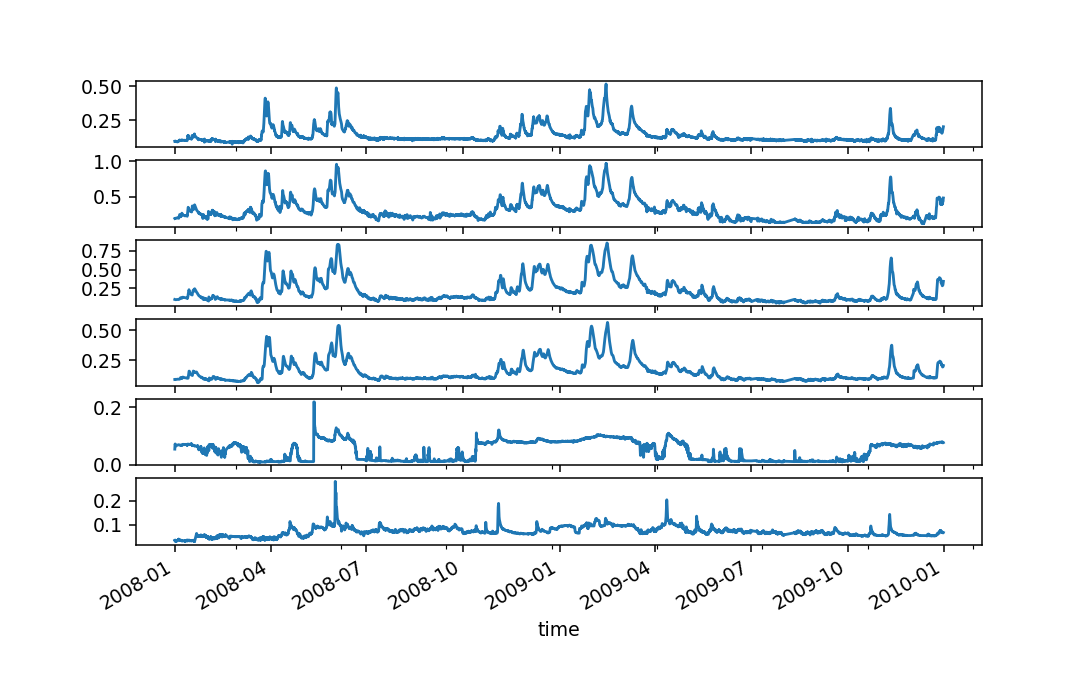

''

In [5]:
time1 = dt.datetime(2008,1,1)
time2 = dt.datetime(2009,12,31)
f1 = time1 <= dfplot.index
f2 = time2 >= dfplot.index
f3 = f1&f2

#['time','Ala','Gri','Nov','Tau','Tud','Zar','Risk','P24','P48','P72']
fig, (ax1, ax2, ax3,
      ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, 
                                          sharey=False,
                                          figsize=(8,5))
dfplot.loc[f3,'Tud'].plot( ax=ax1)
dfplot.loc[f3,'Nov'].plot( ax=ax2)
dfplot.loc[f3,'Ala'].plot( ax=ax3)
dfplot.loc[f3,'Zar'].plot( ax=ax4)
dfplot.loc[f3,'Gri'].plot( ax=ax5)
dfplot.loc[f3,'Tau'].plot( ax=ax6)


;

<IPython.core.display.Javascript object>


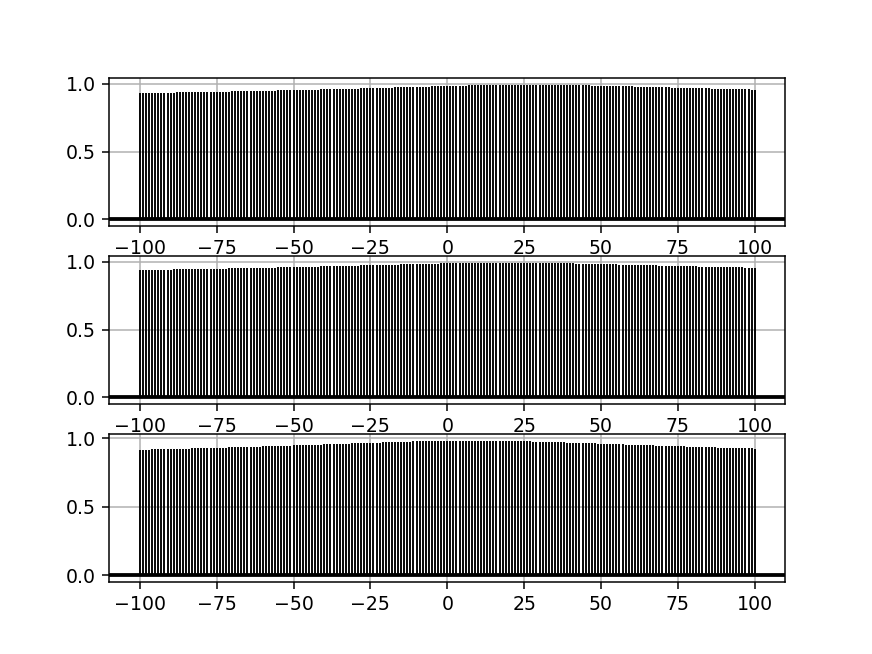

In [15]:

x = dfplot['Zar']
y1 = dfplot['Tud']
y2 = dfplot['Nov']
y3 = dfplot['Ala']

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.xcorr(x, y1, usevlines=True, maxlags=100, normed=True, lw=1)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(312)
ax2.xcorr(x, y2, usevlines=True, maxlags=100, normed=True, lw=1)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

ax3 = fig.add_subplot(313)
ax3.xcorr(x, y3, usevlines=True, maxlags=100, normed=True, lw=1)
ax3.grid(True)
ax3.axhline(0, color='black', lw=2)

plt.show()

## 1 Descriptive Statistics

In [ ]:
peek = data.head(20)
#print(peek)
shape = data.shape
print(shape)
types = data.dtypes
print(types)

In [ ]:
# You will note some calls to pandas.set option() in the recipe to 
# change the precision of the numbers and the preferred width of the output

pd.set_option('display.width', 100)
pd.set_option('precision', 2)
description = data.describe()
#print(description)

#### Class Balance
On classiﬁcation problems you need to know how balanced the class values are. Highly imbalanced
problems (a lot more observations for one class than another) are common and may need special
handling in the data preparation stage.

In [ ]:
class_counts = data.groupby('Risk').size()
print(class_counts)

#### Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not
change together. The most common method for calculating correlation is Pearson’s Correlation
Coeﬃcient, that assumes a normal distribution of the attributes involved. A correlation of -1
or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all.

In [ ]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

#### Skewness of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. The skew result show a positive (right) or negative (left) skew. Values closer to zero show
less skew.

In [ ]:
skew = data.skew()
print(skew)

## 2  Data Visualization

### 2.1 Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

In [ ]:
# Univariate Histograms
df.hist(bins=20, figsize  = [10, 10])
plt.show()

### 2.2 Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.

In [ ]:
data.plot(kind= 'density' , subplots=True, layout=(3,3), sharex=False)
plt.show()

### 2.3 Box and Whisker Plots
Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).

In [ ]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

### 2.4 Multivariate Plots
Plots that show the interactions between multiple variables in your dataset.
* Correlation Matrix Plot.
* Scatter Plot Matrix.

In [ ]:
correlations = df.corr()
# plot correlation matrix
names=df.columns
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
#kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
#      'ytick.major.size': 2, 'xtick.major.size': 2, 'axes.labelcolor': '0'}

#sns.set_style("whitegrid", kw)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, n=10, as_cmap=True)
#cmap = sns.diverging_palette(220, 10, n=10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.5, vmin=0, vmax=1,
            square=True, linewidths=.2, cbar_kws={"shrink": .6})

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(90)
    label.set_fontsize(8)
for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(0)
    label.set_fontsize(8) 

### 2.5 Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [15, 10],
    marker   = ".",
    s        = 0.2,)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

## 3 Prepare  Data For Machine Learning

### 3.1 Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can beneﬁt from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors.

In [ ]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:10,:])

### 3.2 Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
diﬀering means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian
distribution in the input variables and work better with rescaled data, such as linear regression,
logistic regression and linear discriminate analysis. You can standardize data using scikit-learn
with the StandardScaler class

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:10,:])

### 3.3 Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method
can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance
measures such as k-Nearest Neighbors. You can normalize data in Python with scikit-learn
using the Normalizer class

In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=2)
print(normalizedX[0:10,:])

### 3.4 Binarize Data (Make Binary)
You can transform your data using a binary threshold. All values above the threshold are
marked 1 and all equal to or below are marked as 0. This is called binarizing your data or
thresholding your data. It can be useful when you have probabilities that you want to make crisp
values. It is also useful when feature engineering and you want to add new features that indicate
something meaningful. You can create new binary attributes in Python using scikit-learn with
the Binarizer class

In [ ]:
# binarization
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
np.set_printoptions(precision=2)
print(X[0:10,:])
print(binaryX[0:10,:])

## 4 Feature Selection For Machine Learning

The data features that you use to train your machine learning models have a huge inﬂuence on
the performance you can achieve. Irrelevant or partially relevant features can negatively impact
model performance. Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three beneﬁts of performing feature selection
before modeling your data are:

* Reduces Overﬁtting: Less redundant data means less opportunity to make decisions
based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

### 4.1 Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class 2 that can be used
with a suite of diﬀerent statistical tests to select a speciﬁc number of features. The example
below uses the chi-squared (chi 2 ) statistical test for non-negative features to select 4 of the best
features from the  dataset.

### 4.2 Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which attributes 
(and combination of attributes) contribute the most to predicting the target attribute.
The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of
algorithm does not matter too much as long as it is skillful and consistent.

In [57]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# feature extraction
model = LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [ True  True False  True False False]
Feature Ranking: [1 1 4 1 3 2]


### 4.3 Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result. In
the example below, we use PCA and select 3 principal components.

In [ ]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# load data
#X, Y =load_pima_dataset()

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)


### 4.4 Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features. In the example below we construct a ExtraTreesClassifier classiﬁer for the Pima
Indians onset of diabetes dataset. You can see that we are given an importance score for each attribute where the larger the score, the more important the attribute. The scores suggest at the importance of plas, age
and mass.

## 5 Evaluate the Performance of Machine Learning Algorithms with Resampling

You need to know how well your algorithms perform on unseen data. The best way to evaluate
the performance of an algorithm would be to make predictions for new data to which you
already know the answers. The second best way is to use clever techniques from statistics called
resampling methods that allow you to make accurate estimates for how well your algorithm will
perform on new data. In this chapter you will discover how you can estimate the accuracy of
your machine learning algorithms using resampling methods in Python.

We must evaluate our machine learning algorithms on
data that is not used to train the algorithm.
The evaluation is an estimate that we can use to talk about how well we think the algorithm
may actually do in practice. It is not a guarantee of performance. Once we estimate the
performance of our algorithm, we can then re-train the ﬁnal algorithm on the entire training
dataset and get it ready for operational use. Next up we are going to look at four diﬀerent
techniques that we can use to split up our training dataset and create useful estimates of
performance for our machine learning algorithms:

### 5.1 Split into Train and Test Sets
The simplest method that we can use to evaluate the performance of a machine learning
algorithm is to use diﬀerent training and testing datasets. We can take our original dataset and
split it into two parts. Train the algorithm on the ﬁrst part, make predictions on the second
part and evaluate the predictions against the expected results. The size of the split can depend
on the size and speciﬁcs of your dataset, although it is common to use 67% of the data for
training and the remaining 33% for testing.
This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of
records) where there is strong evidence that both splits of the data are representative of the
underlying problem. Because of the speed, it is useful to use this approach when the algorithm
you are investigating is slow to train. A downside of this technique is that it can have a high
variance. This means that diﬀerences in the training and test dataset can result in meaningful
diﬀerences in the estimate of accuracy.

In [16]:
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LinearRegression()
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print('Accuracy: {:.3f}'.format( result*100.0))

Accuracy: 98.571


We can see that the estimated accuracy for the model was approximately 75%. Note that
in addition to specifying the size of the split, we also specify the random seed. Because the
split of the data is random, we want to ensure that the results are reproducible. By specifying
the random seed we ensure that we get the same random numbers each time we run the code
and in turn the same split of data. This is important if we want to compare this result to
the estimated accuracy of another machine learning algorithm or the same algorithm with a
diﬀerent conﬁguration. **To ensure the comparison was apples-for-apples, we must ensure that
they are trained and tested on exactly the same data.**

### 5.2 K-fold Cross Validation
Cross validation is an approach that you can use to estimate the performance of a machine
learning algorithm with less variance than a single train-test set split. It works by splitting
the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
algorithm is trained on k − 1 folds with one held back and tested on the held back fold. This is
repeated so that each fold of the dataset is given a chance to be the held back test set. After
running cross validation you end up with k diﬀerent performance scores that you can summarize
using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is
more accurate because the algorithm is trained and evaluated multiple times on diﬀerent data.
The choice of k must allow the size of each test partition to be large enough to be a reasonable
sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the
algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest
sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are
common. In the example below we use 10-fold cross validation.

In [19]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: {:.3f}% ({:.3f}%)".format(results.mean()*100.0, results.std()*100.0))

Accuracy: 97.789% (1.234%)


### 5.3 Leave One Out Cross Validation
You can conﬁgure cross validation so that the size of the fold is 1 (k is set to the number of
observations in your dataset). This variation of cross validation is called leave-one-out cross
validation. The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data.
A downside is that it can be a computationally more expensive procedure than k-fold cross
validation. In the example below we use leave-one-out cross validation. You can see in the resulting standard deviation that the score has more variance than the k-fold cross
validation results described above.

In [ ]:
# Evaluate using Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Load data
num_folds = 5
loocv = LeaveOneOut()
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print('Accuracy: {:.3f}% ({:.3f}%)'.format( results.mean()*100.0, results.std()*100.0))

### 5.4 Repeated Random Test-Train Splits
Another variation on k-fold cross validation is to create a random split of the data like the
train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, 
like cross validation. This has the speed of using a train/test split and the reduction in variance in the estimated 
performance of k-fold cross validation. You can also repeat the process many more times as needed to improve the accuracy. 
A down side is that repetitions may include much of the same data in the train or the test split from run to run, 
introducing redundancy into the evaluation. The example below splits the data into a 67%/33% train/test split and repeats 
the process 10 times. We can see that in this case the distribution of the performance measure is on par with
k-fold cross validation above.

In [26]:
# Evaluate using Shuffle Split Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# load data

n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: {:.3f}% ({:.3f}%)".format( results.mean()*100.0, results.std()*100.0))


Accuracy: 98.600% (0.020%)


### 5.5 What Techniques to Use When
This section lists some tips to consider what resampling technique to use in different circumstances. Generally k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10. Using a train/test split is good for speed when using a slow algorithm and produces
performance estimates with lower bias when using large datasets.
Techniques like leave-one-out cross validation and repeated random splits can be useful
intermediates when trying to balance variance in the estimated performance, model
training speed and dataset size. The best advice is to experiment and ﬁnd a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.

## 6 Machine Learning Algorithm Performance Metrics


### 6.1 Classiﬁcation Metrics
Classiﬁcation problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems. In this section we will review how to use the following metrics:
* Classiﬁcation Accuracy.
* Logarithmic Loss.
* Area Under ROC Curve.
* Confusion Matrix.
* Classiﬁcation Report.

### 6.2 Regression Metrics
In this section will review 3 of the most common metrics for evaluating predictions on regression machine learning problems:
* Mean Absolute Error.
* Mean Squared Error.
* R2 

#### Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. 
It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, 
but no idea of the direction (e.g. over or under predicting. The example below demonstrates calculating mean absolute 
error on the Boston house price dataset. A value of 0 indicates no error or perfect predictions. Like logloss, this metric 
is inverted by the cross val score() function.

In [27]:
# Cross Validation Regression MAE

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('MAE: {:.3f} ({:.3f})'.format( results.mean(), results.std()))

MAE: -0.064 (0.016)


#### Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts 
the units back to the original units of the output variable and can be meaningful for description and presentation. 
This is called the Root Mean Squared Error (or RMSE). This metric too is inverted so that the results are increasing. 
Remember to take the absolute value before taking the square root if you are interested in calculating the RMSE.

In [37]:
# Cross Validation Regression MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('MSE: {:.3f} ({:.3f})'.format( results.mean(), results.std()))

MSE: -0.008 (0.003)


#### R<sup>2</sup> Metric
The R<sup>2</sup> (or R Squared) metric provides an indication of the goodness of ﬁt of a set of predictions to the actual values. 
In statistical literature this measure is called the coeffcient of determination. This is a value between 0 and 1 for 
no-ﬁt and perfect ﬁt respectively.

In [29]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('R2: {:.3f} ({:.3f})'.format( results.mean(), results.std()))


R2: 0.975 (0.016)


## 8 Regression Algorithms
Spot checking is a way of discovering which algorithms perform well on your machine learning problem. 
You cannot know which algorithms are best suited to your problem beforehand. You must trial a number of methods and 
focus attention on those that prove themselves the most promising.

 Starting with four linear machine learning algorithms:

* Linear Regression.
* Ridge Regression.
* LASSO Linear Regression.
* Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:

* k-Nearest Neighbors.
* Classiﬁcation and Regression Trees.
* Support Vector Machines.

Each recipe is demonstrated on the Boston House Price dataset. This is a regression
problem where all attributes are numeric. A test harness with 10-fold cross validation is used
to demonstrate how to spot-check each machine learning algorithm and mean squared error
measures are used to indicate algorithm performance.

### 8.1 Linear Regression
Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity).



In [38]:
# Linear Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.9750457777887982


### 8.2 Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modiﬁed to minimize the 
complexity of the model measured as the sum squared value of the coefficient values (also called the L2-norm). 

In [39]:
# Ridge Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge


num_folds = 5
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.975042058913286


### 8.3 LASSO Regression
The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modiﬁcation of linear regression, like 
ridge regression, where the loss function is modiﬁed to minimize the complexity of the model measured as the sum absolute 
value of the coeﬃcient values (also called the L1-norm). You can construct a LASSO model by using the Lasso class 3 .

In [40]:
# Lasso Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


kfold = KFold(n_splits=10, random_state=7)
model = Lasso()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.2642311581455731


### 8.4 ElasticNet Regression
ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO 
regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coeffcients) 
by penalizing the model using both the L2-norm (sum squared coeffcient values) and the L1-norm 
(sum absolute coeffcient values).

In [41]:
# ElasticNet Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet


kfold = KFold(n_splits=10, random_state=7)
model = ElasticNet()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.46842514946746616


### Nonlinear Machine Learning Algorithms

### 8.5 K-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction. Of note is the distance metric used (the metric argument). 
The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables differ). 

In [42]:
# KNN Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.9578451881013061


### 8.6 Classiﬁcation and Regression Trees
Decision trees or the Classiﬁcation and Regression Trees (CART as they are known) use the training data to select the 
best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees 
is the mean squared error, speciﬁed in the criterion parameter.

In [43]:
# Decision Tree Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeRegressor()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.9684205068119078


###  8.7 Gradient Boosting


In [36]:
# GB Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

#num_folds = 2
kfold = KFold(n_splits=10, random_state=7)
model = GradientBoostingRegressor(n_estimators=100, 
                                learning_rate=0.1, 
                                max_depth=7, 
                                random_state=0, 
                                loss='ls')
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.9859810308094618


## 9 Compare Machine Learning Algorithms
It is important to compare the performance of multiple diﬀerent machine learning algorithms consistently. 
In this chapter you will discover how you can create a test harness to compare multiple different machine learning 
algorithms in Python with scikit-learn. You can use this test harness as a template on your own machine learning problems 
and add more and different algorithms to compare.

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In the example below six diﬀerent classiﬁcation
algorithms are compared on a single dataset: The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
evaluate each algorithm, importantly conﬁgured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [59]:
# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


# prepare models
models = []
models.append(( 'LINR' , LinearRegression()))
models.append(( 'RDGE' , Ridge()))
models.append(( 'LASS' , Lasso()))
models.append(( 'ELAN' , ElasticNet()))
models.append(( 'KNB' , KNeighborsRegressor()))
models.append(( 'DTR' , DecisionTreeRegressor()))
models.append(( 'GBR' , GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{}: {} ({})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()   

LINR: 0.7053406752484146 (0.14959581190724386)
RDGE: 0.7053396360504166 (0.14959952910607802)
LASS: -0.18451323571357037 (0.3852238742765282)
ELAN: 0.37753268964848774 (0.17591259557549507)
KNB: 0.5951902767131286 (0.20379186978576969)
DTR: 0.4168722560643931 (0.3060055713184103)
GBR: 0.716417035823983 (0.14332652090644743)


Resultados con dataset + df.fillna(method='ffill', inplace=True)
df.dropna(axis=0, how='any', inplace=True)

* LINR: 0.9750457777887982 (0.015868856037480606)
* RDGE: 0.975042058913286 (0.015871207087194267)
* LASS: -0.2642311581455731 (0.46316288309503434)
* ELAN: 0.46842514946746616 (0.18165119820377487)
* KNB: 0.9578451881013061 (0.040987711255285664)
* DTR: 0.9688549342968914 (0.01682524897537758)
* GBR: 0.9848761620018142 (0.007654777483466802)

resiltados con dataset + df.dropna(axis=0, how='any', inplace=True)

* LINR: 0.9784217147695138 (0.012927323964012204)
* RDGE: 0.9784205995474338 (0.01293307235324379)
* LASS: -0.12076160195626355 (0.3169006458694883)
* ELAN: 0.6102644135211436 (0.10769620454103045)
* KNB: 0.9757553595747007 (0.015856709250164244)
* DTR: 0.971648436580686 (0.016043654334785863)
* GBR: 0.986124170554862 (0.007640299998435017)


## 10 Automate Machine Learning Workﬂows with Pipelines

There are standard workﬂows in a machine learning project that can be automated. Pipelines work by allowing for a linear
sequence of data transforms to be chained together culminating in a modeling process that can
be evaluated. The goal is to ensure that all of the steps in the pipeline are constrained to the data available
for the evaluation, such as the training dataset or each fold of the cross validation procedure.

### 10.1 Data Preparation and Modeling Pipeline

An easy trap to fall into in applied machine learning is leaking data from your training dataset
to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. 
This includes data preparation. Data preparation is one easy way to leak knowledge of the whole training dataset 
to the algorithm. For example, preparing your data using normalization or standardization on the entire training 
dataset before learning would not be a valid test because the training dataset would have been inﬂuenced by the scale 
of the data in the test set.

Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross validation procedure.

In [35]:
# Create a pipeline that standardizes the data then creates a model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


# create pipeline
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'LRE' , LinearRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.978421714769514


### 10.2 Feature Extraction and Modeling Pipeline

Feature extraction is another procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in your training dataset. The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained. Importantly, all the feature extraction and the feature union occurs
within each fold of the cross validation procedure.

The example below demonstrates the pipeline  deﬁned with four steps:
1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

In [ ]:
# Create a pipeline that extracts features from the data then creates a model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# load data


# create feature union
features = []
features.append(( 'pca' , PCA(n_components=3)))
features.append(( 'select_best' , SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(( 'feature_union' , feature_union))
estimators.append(( 'logistic' , LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

## 11 Improve Performance with Ensembles


### Combine Models Into Ensemble Predictions

Ensembles can give you a boost in accuracy on your dataset. The three most popular methods for combining the predictions from diﬀerent models are:
* Bagging. Building multiple models (typically of the same type) from diﬀerent subsamples of the training dataset.
* Boosting. Building multiple models (typically of the same type) each of which learns to ﬁx the prediction errors of a prior model in the sequence of models.
* Voting. Building multiple models (typically of diﬀering types) and simple statistics (like calculating the mean) are used to combine predictions.

### 11.1 Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The ﬁnal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:
* Bagged Decision Trees.
* Random Forest.
* Extra Trees.

#### Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. In the example below is an example
of using the BaggingClassifier with the Classiﬁcation and Regression Trees algorithm.
A total of 100 trees are created.

In [ ]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegresor

# load data

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

#### Random Forest
Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiﬁers. Speciﬁcally, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. 
The example below demonstrates using Random Forest for classiﬁcation with 100 trees
and split points chosen from a random selection of 3 features.

In [70]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# load data

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9838906613383192


#### Extra Trees
Extra Trees are another modiﬁcation of bagging where random trees are constructed from
samples of the training dataset. You can construct an Extra Trees model for classiﬁcation using
the ExtraTreesClassifier class 3 . The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

In [69]:
# Extra Trees Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor

# load data

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9813715778691032


### 11.2 Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a ﬁnal
output prediction. The two most common boosting ensemble machine learning algorithms are:
* AdaBoost.
* Stochastic Gradient Boosting.

#### AdaBoost
AdaBoost was perhaps the ﬁrst successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or diﬃcult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

In [67]:
# AdaBoost Regressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor

# load data

num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.942511771179479


## Improve Performance with Algorithm Tuning

Algorithm tuning is a ﬁnal step in the process of applied machine learning before ﬁnalizing your
model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coeﬃcients found by the machine learning
algorithm itself are referred to as parameters. Optimization suggests the search-nature of the
problem. Phrased as a search problem, you can use diﬀerent search strategies to ﬁnd a good and
robust parameter or set of parameters for an algorithm on a given problem.

####  Grid Search Parameter Tuning
Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters speciﬁed in a grid. You can perform a grid
search using the GridSearchCV class 1 . The example below evaluates diﬀerent alpha values for
the Ridge Regression algorithm on the standard diabetes dataset. This is a one-dimensional
grid search.

In [ ]:
# Grid Search for Algorithm Tuning

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load data
#X, Y = load_pima_dataset()

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

#### Random Search Parameter Tuning
Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a ﬁxed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen. The example below evaluates
diﬀerent random alpha values between 0 and 1 for the Ridge Regression algorithm on the
standard diabetes dataset. A total of 100 iterations are performed with uniformly random alpha
values selected in the range between 0 and 1 (the range that alpha values can take).

In [ ]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load data
#X, Y = load_pima_dataset()

param_grid = { 'alpha' : uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

## Save and Load Machine Learning Models

#### Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. 
to serialize your machine learning algorithms and save the serialized format to a ﬁle. Later you
can load this ﬁle to deserialize your model and use it to make new predictions. 

In [ ]:
# Save Model Using Pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

# load data
#X, Y = load_pima_dataset()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb' ))
result = loaded_model.score(X_test, Y_test)
print(result)

#### Finalize Your Model with Joblib
The Joblib library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, eﬃciently 3 . This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). The example below
demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes
dataset, save the model to ﬁle using Joblib and load it to make predictions on the unseen test
set.

In [ ]:
# Save Model Using joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

# load data
# X, Y = load_pima_dataset()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...

# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

### Tips for Finalizing Your Model
This section lists some important considerations when ﬁnalizing your machine learning models.

* Python Version. Take note of the Python version. You almost certainly require the same major (and maybe minor) version of Python used to serialize the model when you later load it and deserialize it.

* Library Versions. The version of all major libraries used in your machine learning project almost certainly need to be the same when deserializing a saved model. This is not limited to the version of NumPy and the version of scikit-learn.

* Manual Serialization. You might like to manually output the parameters of your learned model so that you can use them directly in scikit-learn or another platform in the future. Often the techniques used internally by machine learning algorithms to make predictions are a lot simpler than those used to learn the parameters can may be easy to implement in custom code that you have control over.